# XGBoost

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

## Usando un split Random

### Validación cruzada

In [7]:
df = pd.read_csv('scaled_df.csv')

#identificar las variables y división de datos
target = 'peakwavs_max'
features = [col for col in df.columns if col not in ['smiles', 'solvent', 'source', target]]

x = df[features]
y = df[target]

xgb = XGBRegressor(
    n_estimators=700, 
    learning_rate=0.1,
    max_depth=17,
    gamma=0.1,
    min_child_weight=7,
    colsample_bytree=1,
    subsample=1.0,
    objective='reg:squarederror',
    verbosity=1,
    random_state= 22
)
print(cross_val_score(xgb, x, y, cv=5, scoring='neg_mean_absolute_error' ))

[-24.06142587 -24.6703204  -20.65117834 -19.81682075 -17.0485831 ]


### Validación final
    con los hyperparámetros obtenidos mediante optimización

In [9]:
df = pd.read_csv('scaled_df.csv')

#identificar las variables y división de datos
target = 'peakwavs_max'
features = [col for col in df.columns if col not in ['smiles', 'solvent', 'source', target]]

x = df[features]
y = df[target]
x_train_r, x_test_r, y_train_r, y_test_r = train_test_split(x, y, test_size=0.2, random_state=42)

#Entrenamiento del xgboost y predicciones
xgb = XGBRegressor(
    n_estimators=700, 
    learning_rate=0.1,
    max_depth=17,
    gamma=0.1,
    min_child_weight=7,
    colsample_bytree=1,
    subsample=1.0,
    objective='reg:squarederror',
    verbosity=1 
)
xgb.fit(x_train_r, y_train_r)

y_pred_r = xgb.predict(x_test_r)

## GUARDAR RESULTADOS

resultados_df = pd.DataFrame()
resultados_df['peakwavs_max'] = y_test_r
resultados_df['peakwavs_max_pred'] = y_pred_r
resultados_df.to_csv('Resultados/xgboost/random/xgb_predicciones.csv', index=False)


Error absoluto medio: 11.9032


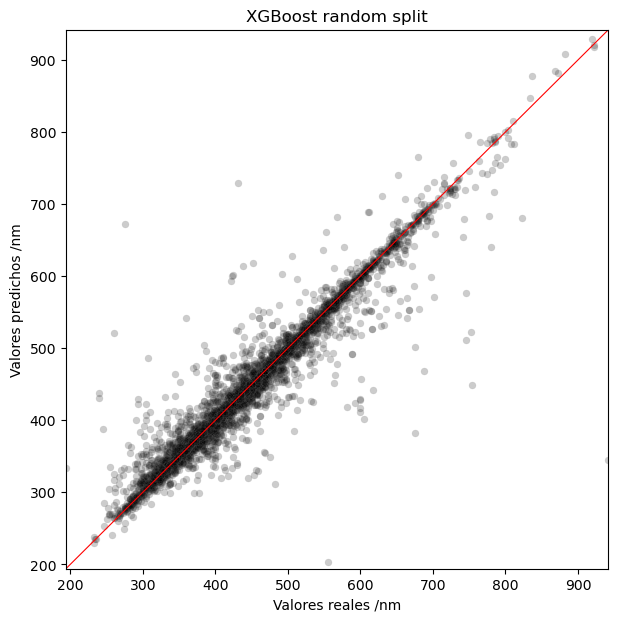

In [73]:
#Cálculo de error y visualización 

mae = mean_absolute_error(y_test_r, y_pred_r)
print(f'Error absoluto medio: {mae:.4f}')

plt.figure(figsize=(7, 7))
sns.scatterplot(x=y_test_r, y=y_pred_r, marker = 'o', s = 25, edgecolors = 'tab:gray' , alpha = 0.2, color = 'k')
plt.xlabel("Valores reales /nm")
plt.ylabel("Valores predichos /nm")
plt.title("XGBoost random split")

# Se ponen los límites de los ejes superiores e inferiores como el máximo y mínimo
(inf, sup) = plt.xlim(min(y_test_r.min(), y_pred_r.min()), max(y_test_r.max(), y_pred_r.max()))
plt.ylim(inf, sup)
plt.plot([inf, sup], [inf, sup], color='r', linestyle='-', linewidth = 0.8)
plt.savefig('Resultados/xgboost/random/xgb_random.png', bbox_inches='tight', dpi = 600)
plt.show()

## Usando el split por scaffold

### Validación cruzada

In [86]:
archivos_train = ['train_1.csv', 'train_2.csv', 'train_3.csv', 'train_4.csv', 'train_5.csv']
archivos_test = ['test_1.csv', 'test_2.csv', 'test_3.csv', 'test_4.csv', 'test_5.csv']

resultados= []

for archivo_train, archivo_test in zip(archivos_train, archivos_test):
  
    train_cv = pd.read_csv(f'CV/{archivo_train}')
    test_cv = pd.read_csv(f'CV/{archivo_test}')
    target = 'peakwavs_max'
    features = [col for col in train_cv.columns if col not in ['smiles', 'solvent', target]]
    
    x_train = train_cv[features]
    y_train = train_cv[target]
    x_test = test_cv[features]
    y_test = test_cv[target]
    
    xgb = XGBRegressor(
        n_estimators=900, 
        learning_rate=0.1,
        max_depth=17,
        gamma=0.1,
        min_child_weight=7,
        colsample_bytree=1,
        subsample=1.0,
        objective='reg:squarederror',
        verbosity=1 
    )
    xgb.fit(x_train, y_train)
    y_pred = xgb.predict(x_test)

    resultados.append(mean_absolute_error(y_test, y_pred))
    
print(f'Error absoluto medio de cada fold: {resultados}')
print('Error medio de todos los folds: ', np.mean(resultados))

Error absoluto medio de cada fold: [25.945445112091242, 23.425908159815773, 26.615140693073503, 26.636589704020675, 25.129980661345304]
Error medio de todos los folds:  25.550612866069297


### Validación final
    con los hyperparámetros obtenidos mediante optimización

In [88]:
mi_dir = '/home/xavi/Escritorio/midirectorio/'

# Identificar características y variable objetivo
train = pd.read_csv(f'{mi_dir}CV/train_2.csv')
test = pd.read_csv(f'{mi_dir}CV/test_2.csv')
target = 'peakwavs_max'
features = [col for col in train.columns if col not in ['smiles', 'solvent', target]]

# Dividir en conjunto de entrenamiento y prueba
x_train_s = train[features]
y_train_s = train[target]

x_test_s = test[features]
y_test_s = test[target]

#Entrenamiento del xgboost y predicciones
xgb = XGBRegressor(
    n_estimators=900, 
    learning_rate=0.1,
    max_depth=17,
    gamma=0.1,
    min_child_weight=7,
    colsample_bytree=1,
    subsample=1.0,
    objective='reg:squarederror',
    verbosity=1 
)
xgb.fit(x_train_s, y_train_s)

y_pred_s = xgb.predict(x_test_s)


## GUARDAR RESULTADOS

resultados_df = pd.DataFrame()
resultados_df['peakwavs_max'] = y_test_s
resultados_df['peakwavs_max_pred'] = y_pred_s
resultados_df.to_csv('Resultados/xgboost/scaffold/xgb_scaffold_predicciones.csv', index=False)

Error absoluto medio: 23.4259


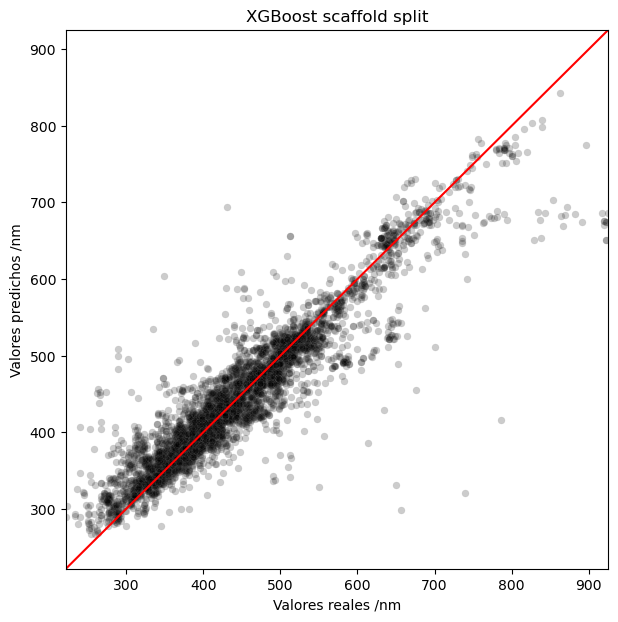

In [89]:
#Cálculo de error y visualización 

mae = mean_absolute_error(y_test_s, y_pred_s)
print(f'Error absoluto medio: {mae:.4f}')

plt.figure(figsize=(7, 7))
sns.scatterplot(x=y_test_s, y=y_pred_s, marker = 'o', s = 25, edgecolors = 'tab:gray' , alpha = 0.2, color = 'k')
plt.xlabel("Valores reales /nm")
plt.ylabel("Valores predichos /nm")
plt.title("XGBoost scaffold split")

# Se ponen los límites de los ejes superiores e inferiores como el máximo y mínimo
(inf, sup) = plt.xlim(min(y_test_s.min(), y_pred_s.min()), max(y_test_s.max(), y_pred_s.max()))
plt.ylim(inf, sup)
plt.plot([inf, sup], [inf, sup], color='r', linestyle='-')
plt.savefig('Resultados/xgboost/scaffold/xgb_scaffold.png', bbox_inches='tight', dpi= 600)
plt.show()